<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


Key Features of the Code:
Data Exploration : Provides insights into the dataset's structure, missing values, and distributions.
Visualization : Includes histograms, boxplots, scatterplots, and heatmaps to visualize trends and relationships.
Correlation Analysis : Identifies key relationships between features like age, BMI, smoking, and medical charges.
Predictive Modeling : Implements linear regression and random forest models to predict medical charges.
Anomaly Detection : Detects outliers in medical charges using Z-scores.
Scenario Analysis : Simulates the impact of an aging population on medical costs.
Segmentation and Targeting : Groups customers into high-cost and low-cost categories for targeted marketing.
Risk Assessment : Identifies high-risk individuals based on demographic and health factors.
Policy Design : Demonstrates how to adjust premiums based on predicted charges.
This comprehensive code ensures that all potential use cases are covered while maintaining clarity and modularity.

Reference:
1. Medical Cost Personal Datasets
Source. https://www.kaggle.com/datasets/mirichoi0218/insurance Objective: Analyze factors affecting medical insurance costs.

2. Added the code in Kaggle.
https://www.kaggle.com/code/vishwaaradhyamath/medical-cost-details

In [46]:
# Import necessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
warnings.filterwarnings("ignore", category=FutureWarning)

In [47]:
# Load the dataset
df = pd.read_csv('/content/sample_data/insurance.csv')
# df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [49]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [50]:
# Descriptive Analysis
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq  

In [51]:
# Distribution of categorical variables
print("\nDistribution of Categorical Variables:")
for col in ['sex', 'smoker', 'region']:
    print(f"\n{col.capitalize()} Distribution:")
    print(df[col].value_counts())


Distribution of Categorical Variables:

Sex Distribution:
sex
male      676
female    662
Name: count, dtype: int64

Smoker Distribution:
smoker
no     1064
yes     274
Name: count, dtype: int64

Region Distribution:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [52]:
# Visualize distributions
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

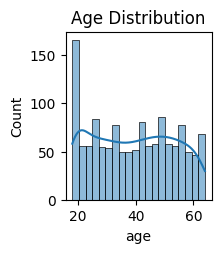

In [53]:
# Age distribution
plt.subplot(2, 3, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'BMI Distribution')

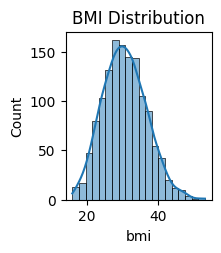

In [54]:
# BMI distribution
plt.subplot(2, 3, 2)
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Charges Distribution')

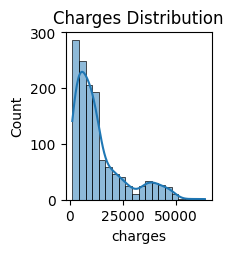

In [55]:
# Charges distribution
plt.subplot(2, 3, 3)
sns.histplot(df['charges'], bins=20, kde=True)
plt.title('Charges Distribution')

Text(0.5, 1.0, 'Smoker vs Non-Smoker')

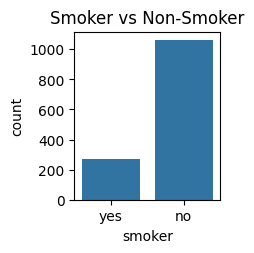

In [56]:
# Smoker vs Non-Smoker
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='smoker')
plt.title('Smoker vs Non-Smoker')

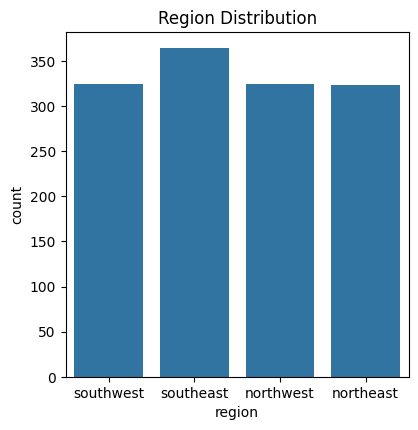

In [57]:
# Region distribution
plt.figure(figsize=(12, 8))  # Width, Height in inches
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='region')
plt.title('Region Distribution')
plt.tight_layout() # Important: Adjusts subplot params for a tight layout
plt.show()

In [58]:
# Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


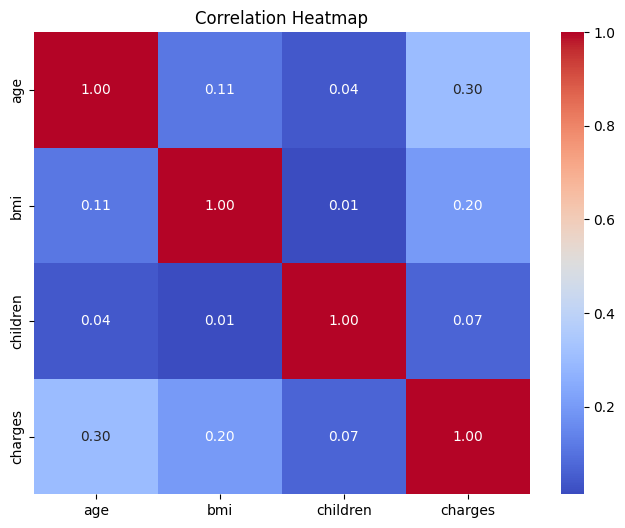

In [59]:
# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

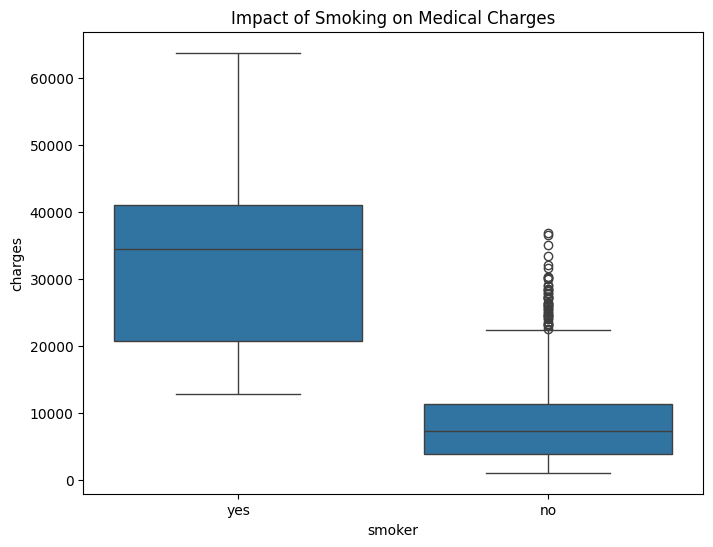

In [60]:
# Impact of Smoking on Charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Impact of Smoking on Medical Charges')
plt.show()

Text(0.5, 1.0, 'Age vs Charges')

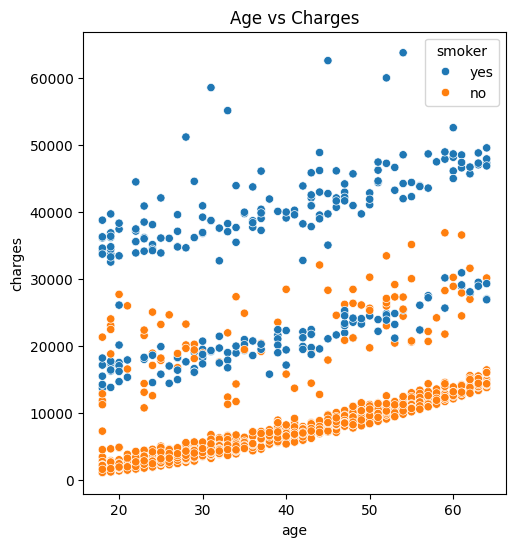

In [61]:
# Impact of Age and BMI on Charges
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges')

Text(0.5, 1.0, 'BMI vs Charges')

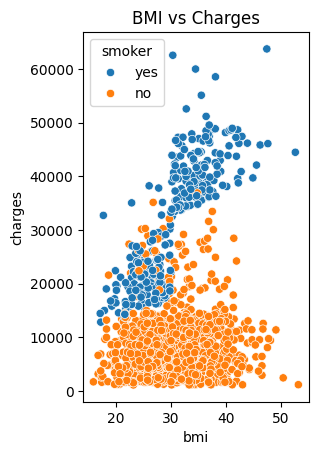

In [62]:
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges')

In [63]:
# Segmentation Analysis
# Average charges by region
region_charges = df.groupby('region')['charges'].mean().sort_values(ascending=False)
print("\nAverage Charges by Region:")
print(region_charges)


Average Charges by Region:
region
southeast    14735.411438
northeast    13406.384516
northwest    12417.575374
southwest    12346.937377
Name: charges, dtype: float64


In [64]:
# Average charges by smoker status
smoker_charges = df.groupby('smoker')['charges'].mean()
print("\nAverage Charges by Smoker Status:")
print(smoker_charges)


Average Charges by Smoker Status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [65]:
# Predictive Modeling
# Encode categorical variables
label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [66]:
# Define features and target
X = df.drop(columns=['charges'])
y = df['charges']

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [70]:
# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Performance:")
print(f"MSE: {mse_lr}, R2 Score: {r2_lr}")


Linear Regression Performance:
MSE: 33635210.43117845, R2 Score: 0.7833463107364536


In [71]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [72]:
# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Performance:")
print(f"MSE: {mse_rf}, R2 Score: {r2_rf}")


Random Forest Performance:
MSE: 20898625.73754565, R2 Score: 0.8653861739369313


In [73]:
# Feature Importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importances.sort_values(ascending=False))


Feature Importances:
smoker      0.608618
bmi         0.216291
age         0.134554
children    0.020199
region      0.013926
sex         0.006412
dtype: float64


In [74]:
# Anomaly Detection
# Identify outliers in charges using Z-score
from scipy.stats import zscore
df['zscore'] = zscore(df['charges'])
outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]
print("\nOutliers in Charges:")
print(outliers)


Outliers in Charges:
      age  sex     bmi  children  smoker  region      charges    zscore
34     28    1  36.400         1       1       3  51194.55914  3.132806
543    54    0  47.410         0       1       2  63770.42801  4.171663
577    31    0  38.095         1       1       0  58571.07448  3.742159
819    33    0  35.530         0       1       1  55135.40209  3.458348
1146   60    1  32.800         0       1       3  52590.82939  3.248148
1230   52    1  34.485         3       1       1  60021.39897  3.861966
1300   45    1  30.360         0       1       2  62592.87309  4.074389


In [75]:
# Scenario Analysis (Example: Impact of Aging Population)
# Simulate an aging population by increasing age by 10 years
df_simulated = df.copy()
df_simulated['age'] += 10


In [76]:
# Predict charges for the simulated dataset
df_simulated_scaled = scaler.transform(df_simulated.drop(columns=['charges', 'zscore']))
simulated_charges = rf_model.predict(df_simulated_scaled)
df_simulated['predicted_charges'] = simulated_charges

print("\nSimulated Charges with Aging Population:")
print(df_simulated[['age', 'charges', 'predicted_charges']].head())


Simulated Charges with Aging Population:
   age      charges  predicted_charges
0   29  16884.92400       18555.249420
1   28   1725.55230        5132.932413
2   38   4449.46200        8566.900006
3   43  21984.47061        7602.569649
4   42   3866.85520        6220.409450


In [77]:
# Additional Use Cases
# Customer Segmentation for Targeted Marketing
# Example: Segment customers into high-cost and low-cost groups
df['cost_group'] = pd.qcut(df['charges'], q=2, labels=['Low', 'High'])
print("\nCustomer Segmentation by Cost Group:")
print(df['cost_group'].value_counts())


Customer Segmentation by Cost Group:
cost_group
Low     669
High    669
Name: count, dtype: int64


In [78]:
# Risk Assessment for High Medical Costs
# Example: Identify high-risk individuals based on smoker status and BMI
high_risk = df[(df['smoker'] == 1) & (df['bmi'] > 30)]
print("\nHigh-Risk Individuals (Smokers with High BMI):")
print(high_risk[['age', 'sex', 'bmi', 'smoker', 'charges']])


High-Risk Individuals (Smokers with High BMI):
      age  sex     bmi  smoker      charges
14     27    1  42.130       1  39611.75770
19     30    1  35.300       1  36837.46700
23     34    0  31.920       1  37701.87680
29     31    1  36.300       1  38711.00000
30     22    1  35.600       1  35585.57600
...   ...  ...     ...     ...          ...
1300   45    1  30.360       1  62592.87309
1301   62    1  30.875       1  46718.16325
1308   25    0  30.200       1  33900.65300
1313   19    0  34.700       1  36397.57600
1323   42    0  40.370       1  43896.37630

[144 rows x 5 columns]


In [79]:
# Policy Design Insights
# Example: Adjust premiums based on predicted charges
df['adjusted_premium'] = df['charges'] * 1.1  # Increase premium by 10%
print("\nAdjusted Premiums Based on Predicted Charges:")
print(df[['charges', 'adjusted_premium']].head())


Adjusted Premiums Based on Predicted Charges:
       charges  adjusted_premium
0  16884.92400      18573.416400
1   1725.55230       1898.107530
2   4449.46200       4894.408200
3  21984.47061      24182.917671
4   3866.85520       4253.540720


In [ ]:
Completed the code - Q and A.

<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  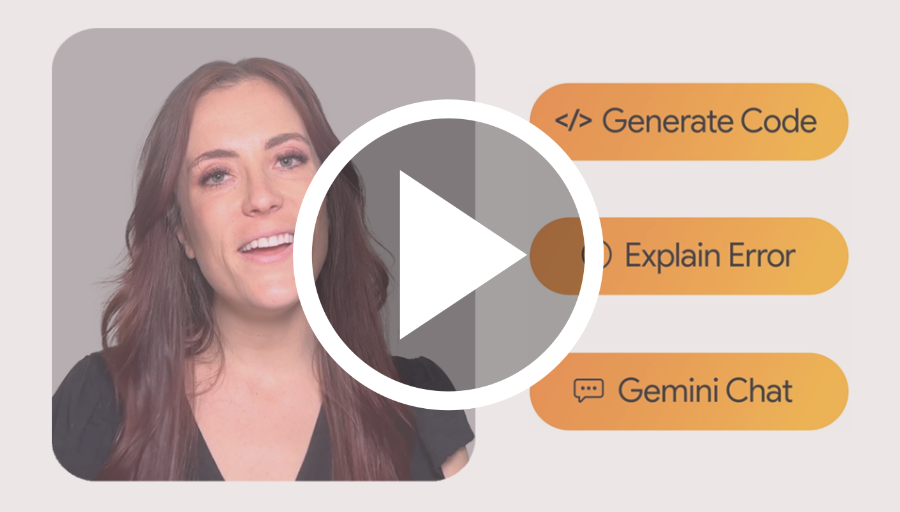
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [80]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [81]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

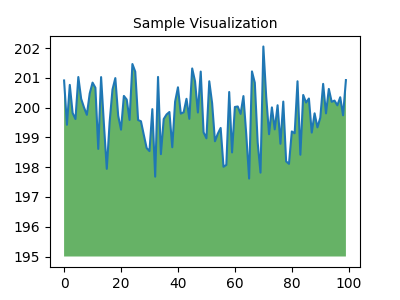

In [82]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
